# Graph Collaborative Filter

## Find Similar Items

### Problem: 
Given a set of movies and their ratings by users, find similar movies based on user ratings.

### Solution: 
We can model this problem as a graph, where the movies are nodes and the user ratings are edges with weights representing the similarity between movies. We can then use NetworkX to find similar movies based on user ratings.

In this example, we define the movies and their ratings by users as a dictionary, where each key is a movie and the value is another dictionary representing the user ratings and the corresponding scores. We then create a graph and add the nodes and edges based on the similarity between movies, which is calculated as the sum of squared differences between the user ratings for each movie. We draw the graph to visualize it, and then use the sorted function to find the similar movies to a given movie based on the edge weights.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Define the movies and their ratings by users
movies = {
    'The Godfather': {'Alice': 9, 'Bob': 8, 'Charlie': 7},
    'The Shawshank Redemption': {'Alice': 8, 'Bob': 9, 'Charlie': 8},
    'The Dark Knight': {'Alice': 9, 'Bob': 9, 'Charlie': 7, 'Dave': 8},
    'Forrest Gump': {'Bob': 9, 'Charlie': 8, 'Dave': 7},
    'Pulp Fiction': {'Alice': 8, 'Charlie': 9, 'Dave': 8},
    'The Lord of the Rings: The Return of the King': {'Alice': 9, 'Charlie': 9, 'Dave': 8}
}

In [3]:
# Create a graph and add the nodes and edges
G = nx.Graph()
G.add_nodes_from(movies.keys())
for u in movies:
    for v in movies:
        if u != v:
            similarity = sum((movies[u].get(k, 0) - movies[v].get(k, 0)) ** 2 for k in set(movies[u]) | set(movies[v]))
            G.add_edge(u, v, weight=similarity)

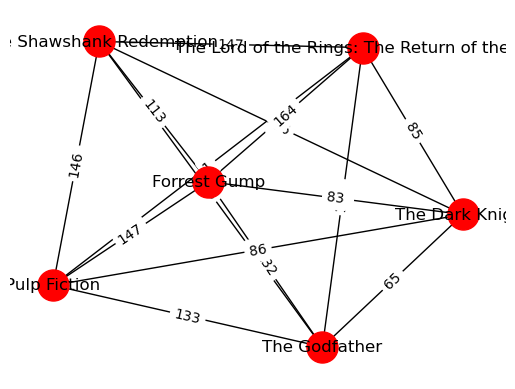

In [4]:
# Draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='r')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in G.edges()})
plt.axis('off')
plt.show()

In [5]:
# Find similar movies to a given movie
movie = 'The Godfather'
similar_movies = sorted(G[movie], key=lambda x: G[movie][x]['weight'], reverse=True)
print('Similar movies to', movie, ':', similar_movies)

Similar movies to The Godfather : ['Pulp Fiction', 'Forrest Gump', 'The Lord of the Rings: The Return of the King', 'The Dark Knight', 'The Shawshank Redemption']
